### Is this mushroom edible? Try it!

<br>
<img src="https://raw.githubusercontent.com/YData123/sds265-fa21/main/demos/classification/mushrooms.jpg" width="110" align="left" style="margin:10px 15px">

Have you every gone for a walk in the woods and been tempted to bring back some mushrooms for your dinner salad? Well, you may then wonder how many edible or poisonous mushrooms you might need to be shown before you could confidently forage in the forest on your own. We'll first load a database of mushrooms that have been hand-classified according to whether or not they are poisonous. Then, we'll put it into a form suitable for logistic regression by converting all of the categorical variables to "dummy" variables using a "1-hot" representation. Then we'll fit logistic regression models on training sets of increasing size.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa21/main/demos/classification/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


A description of these mushroom data can be found [here](https://archive.ics.uci.edu/ml/datasets/Mushroom).

In [3]:
data['class'] = LabelEncoder().fit_transform(data['class'])
encoded_data = pd.get_dummies(data)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0



The transformation is mapping each categorical variable to a series of 1-hot or "dummy" variables,
so the weights are meaningful in a logistic regression model.



Next, we convert this DataFrame to numpy arrays, suitable for input to sklearn.

In [4]:
y = encoded_data['class'].values
X = encoded_data.drop('class', axis=1).values


#### Dimensions of the data

Ok, now before we get to work building a classifier, let's look at some 
of the characteristics of the data. Following code finds
the number of data points, number of predictor variables, the number of
expanded predictors, and percentage of poisonous mushrooms in the data.

In [5]:
num_data_points = X.shape[0] 
num_original_predictors = data.shape[1]-1
num_expanded_predictors = X.shape[1]
poisonous = np.mean(y)*100

print("Number of data points: %d" % num_data_points)
print("Number of original predictors: %d" % num_original_predictors)
print("Number of expanded predictors: %d" % num_expanded_predictors)
print("Percent poisonous: %.1f%%" % poisonous)

Number of data points: 8124
Number of original predictors: 22
Number of expanded predictors: 117
Percent poisonous: 48.2%


#### Fitting logistic regression models

Next, we will construct a series of logistic regression models with an increasing number of training points. Specifically, we will:

* let the sample size $n$ vary from 10 to 400 in increments of 1
* for each $n$ train a logistic regression model on $n$ randomly selected training points, and test on the remaining data
* for each $n$, do this 10 times and average the error rates
* plot the resulting average error rates as a function of $n$

Some notes:

* We will use the function `sklearn.model_selection.train_test_split` in each trial to randomly split the data into training and test sets. For example, you can use `train_test_split(X, y, train_size=n)`
* The implementation only requires about 10-15 lines of code. 

100%|██████████| 196/196 [00:21<00:00,  8.95it/s]


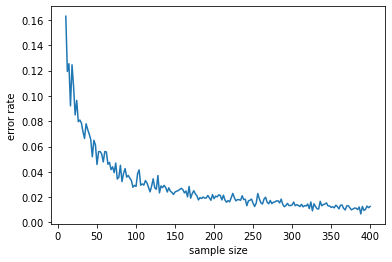

In [6]:
trials = 10
sample_size = np.arange(10, 401, 2)
error_rate = np.zeros(len(sample_size))
lr = LogisticRegression(solver='lbfgs')

from tqdm import tqdm
error_rate = []
lr = LogisticRegression(solver='lbfgs')
for n in tqdm(sample_size):
    err = []
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n)
        lr.fit(X_train, y_train)
        this_err = np.mean(lr.predict(X_test) != y_test)
        err.append(this_err)
    error_rate.append(np.mean(err))

plt.plot(sample_size, error_rate)
plt.xlabel('sample size')
_ = plt.ylabel('error rate')

####  Sample sizes to get 5% and 1% error

We now ask how many data points are required before the error falls below 5 percent? Below 1 percent?


In [7]:
e = np.array(error_rate)

n_05 = np.min(sample_size[np.where(e < 0.05)])
print("%d samples are required before the error falls below 5%%" % n_05)

n_01 = np.min(sample_size[np.where(e < 0.01)])
print("%d samples are required before the error falls below 1%%" % n_01)

50 samples are required before the error falls below 5%
326 samples are required before the error falls below 1%


### Flower power: Logistic regression on the Iris data

<img src="https://raw.githubusercontent.com/YData123/sds265-fa21/main/demos/classification/irises.png" width="500" align="top">

We'll now carry out logistic regression for classification of the iris data. 



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

The following cell plots the original data in terms of sepal and petal dimensions.

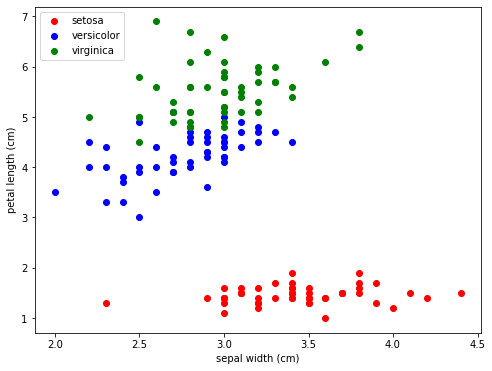

In [9]:
from sklearn.datasets import load_iris

fig = plt.figure(figsize=(8,6))
iris = load_iris()
x_index = 1
y_index = 2
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'green']
for c in np.arange(3):
    mask = (iris.target==c)
    plt.scatter(iris.data[mask, x_index], iris.data[mask, y_index], color=colors[c], label=iris.target_names[c])

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

#### Training logistic regression models

We'll construct a series of logistic regression models using an increasing number of training points. 
Specifically, we will

* let the sample size 10% of the data to 90% of the data, in increments of 10%
* for each sample size, train a logistic regression model on randomly selected training points, and test on the remaining data
* For each sample size, run 1000 trials and average the error rates
* Plot the resulting average error rates as a function of sample percentage of the data

Some notes:

* As before, we will use the function sklearn.model_selection.train_test_split in each trial to randomly split the data into training and test sets. For example, you can use train_test_split(X, y, train_size=.1)
* We now use `lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')` to fit a logistic regression model to predict the three class labels (*versicolor*, *virginica*, and *setosa*). This is a linear model of the log-odds, just as for binary logistic regression. The decision boundaries will be linear functions of the four predictor variables.
* In a little more detail, in a logistic regression model to carry out three-way classification where $Y$ can be 0, 1, or 2, the model takes the form
$$ P(Y=0 \,|\, x) = \frac{1}{1 + e^{\beta_1^T x} + e^{\beta_2^T x}}$$
<br>
$$ P(Y=1 \,|\, x) = \frac{e^{\beta_1^T x}}{1 + e^{\beta_1^T x} + e^{\beta_2^T x}}$$
<br>
$$ P(Y=2 \,|\, x) = \frac{e^{\beta_2^T x}}{1 + e^{\beta_1^T x} + e^{\beta_2^T x}}$$
<br>
* The decision boundaries between any two classes in such a model are linear.


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


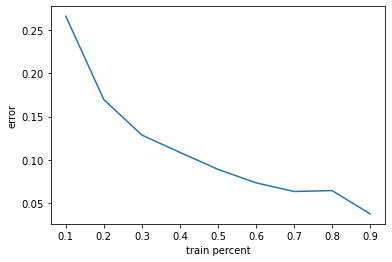

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')
lr_error_rate = []
trials = 100
train_percent = np.linspace(.1,.9,num=9)

# your code here
from tqdm import tqdm
for p in tqdm(train_percent):
    errs = []
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=p)
        lr.fit(X_train, y_train)
        err = np.mean(lr.predict(X_test) != y_test)
        errs.append(err)
    this_err = np.mean(errs)
    lr_error_rate.append(this_err)
    
plt.plot(train_percent, lr_error_rate)
plt.xlabel('train percent')
_ = plt.ylabel('error')

#### Finding the minimum error

What is the smallest average error attained by logistic regression?

In [11]:
min_error = np.min(np.array(lr_error_rate)) 
print("The minimum error attained by the logistic regression is %.2f%%" % (100*min_error))

The minimum error attained by the logistic regression is 3.73%


### Your turn! 

As an exercise to solidfy your understanding of some of the concepts and coding above, please now modify the code to put error bars on the above learning curves. Specifically, estimate the standard deviation of the training error, and put bars at each point at plus/minus one standard deviation. What do the results say about the level of uncertainty? 